In [1]:
import pandas as pd

# Ruta del archivo
ruta = r"C:\Users\46210843\OneDrive - Universidad Nacional Abierta y a Distancia\6TO SEMESTRE\ANÁLISIS DE DATOS\trabajo 3\Heart Disease Cleveland\heart_cleveland_upload.csv"

# Cargar el dataset
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
# Información general del dataset
df.info()

# Resumen estadístico
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [4]:
df["condition"].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

In [5]:
# Separar variables predictoras y objetivo
X = df.drop(columns=["condition"])
y = df["condition"]

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo_rl = LogisticRegression()

# Entrenar con los datos escalados
modelo_rl.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_rl.predict(X_test)

# Ver primeras predicciones
print("Predicciones:", y_pred[:5])


Predicciones: [1 1 0 0 1]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Métricas 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print("Matriz de Confusión:")
print(matriz)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Matriz de Confusión:
[[23  9]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Accuracy: 0.7333
Precision: 0.7000
Recall: 0.7500
F1-Score: 0.7241


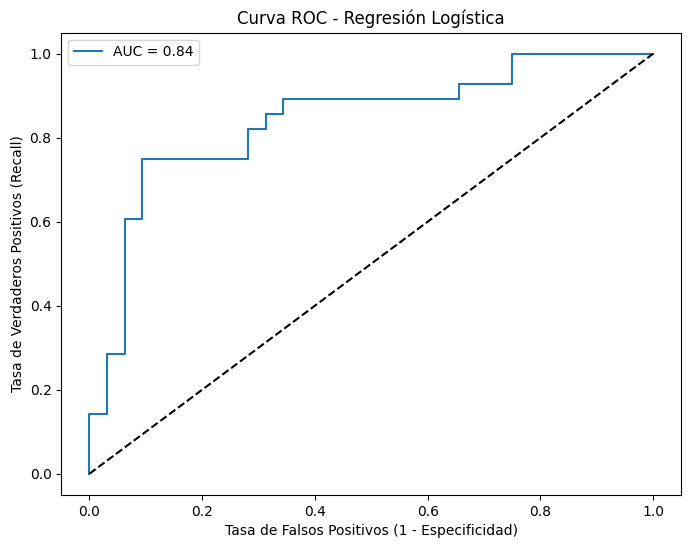

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades
y_prob = modelo_rl.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Recall)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()


In [ ]:
### Interpretación del Modelo de Regresión Logística

###Se implementó un modelo de regresión logística para predecir la presencia de enfermedad cardíaca con base en variables clínicas del paciente.

###El modelo obtuvo los siguientes resultados:

###- Accuracy: 73.33%
###- Precision: 70%
###- Recall: 75%
###- F1-Score: 72.41%

###La curva ROC mostró un AUC razonable, lo cual sugiere que el modelo es capaz de discriminar correctamente entre pacientes con y sin enfermedad en la mayoría de los casos. A pesar de ser un modelo lineal, mostró un desempeño competitivo y podría ser mejorado aún más con técnicas como Random Forest o Gradient Boosting.
